In [ ]:
1.Data Exploration

In [67]:
import pandas as pd
df_bookings=pd.read_csv("C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [68]:
df_bookings.shape

(134590, 12)

In [69]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [70]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [71]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

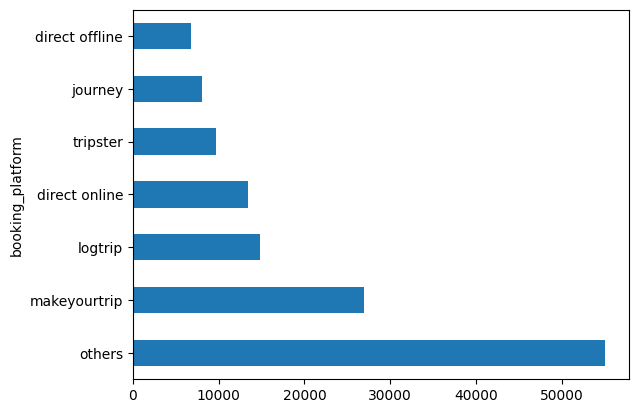

In [74]:
df_bookings.booking_platform.value_counts().plot(kind='barh')

In [76]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [81]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [86]:
df_date = pd.read_csv('C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\dim_date.csv')
df_hotels = pd.read_csv('C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\dim_hotels.csv')
df_rooms = pd.read_csv('C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\dim_rooms.csv')
df_agg_bookings = pd.read_csv('C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\fact_aggregated_bookings.csv')

In [90]:
df_hotels.shape

(25, 4)

In [92]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

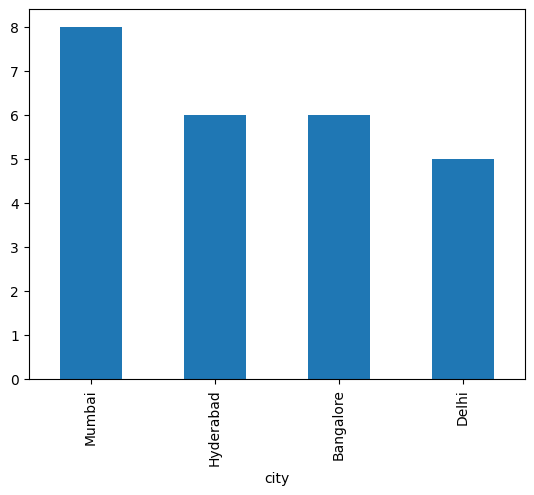

In [99]:
df_hotels.city.value_counts().sort_values(ascending=False).plot(kind='bar')

In [100]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [101]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [102]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [103]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [104]:
df_agg_bookings.capacity.max()

50.0

In [ ]:
2.Data Cleaning

In [ ]:
1.Clean Number of Guests

In [105]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [107]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [108]:
df_bookings.shape

(134590, 12)

In [109]:
df_bookings[df_bookings.no_guests>0]



,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
2) Outlier removal in revenue realized

In [111]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [112]:
df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.median()

(15378.05412734973, 13500.0)

In [116]:
avg,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
avg,std

(15378.05412734973, 93036.03867095453)

In [117]:
higher_limit=avg+3*std
higher_limit

294486.17014021333

In [118]:
lower_limit=avg+3-std
lower_limit

-77654.9845436048

In [121]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [123]:
df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.shape

(134585, 12)

In [125]:
df_bookings.revenue_realized.describe()

count    134585.000000
mean      12696.095025
std        6928.058192
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [126]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33480.26960155918

In [127]:
lower_limit = df_bookings.revenue_realized.mean() - 3*df_bookings.revenue_realized.std()
lower_limit

-8088.0795506619725

In [128]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-22,31-07-22,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [129]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [132]:
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16073.000000
mean     23440.103652
std       9048.865206
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [135]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77905
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [140]:
df_agg_bookings.shape

(9200, 5)

In [142]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [144]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [152]:
median=round(df_agg_bookings.capacity.median(),2)
median

25.0

In [156]:
df_agg_bookings.capacity.fillna(median,inplace=True
                               )

In [157]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


In [ ]:
Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [158]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [ ]:
3.Data Transformation

In [179]:
df_agg_bookings=pd.read_csv("C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\fact_aggregated_bookings.csv")
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [189]:
df_agg_bookings["occ_pct"]=df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [190]:
df_agg_bookings["occ_pct"]=df_agg_bookings["occ_pct"].apply(lambda x:round(x*100,2))
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89


In [ ]:
4.Insights Generation

In [ ]:
1.What  is the average occupancy rate  in each of the room categories?

In [12]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [15]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [19]:
df=pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id')
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [20]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [ ]:
2.Print average occupancy rate per city

In [22]:
df_hotels = pd.read_csv('C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\dim_hotels.csv')
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [24]:
df=pd.merge(df,df_hotels,on='property_id')
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai


<Axes: ylabel='occ_pct'>

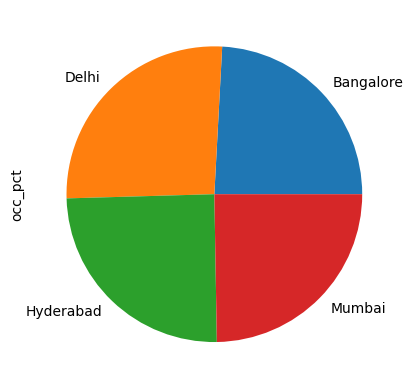

In [28]:
df.groupby('city_y')['occ_pct'].mean().round(2).plot(kind='pie')

In [ ]:
3.When was the occupancy better ?Weekend or weekday

In [29]:
df_date = pd.read_csv('C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\dim_date.csv')
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [30]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai


In [33]:
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date')
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,16559,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,RT2,Elite,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,RT3,Premium,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday


In [37]:
df.groupby('day_type_y')['occ_pct'].mean().round(2)

day_type_y
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

In [ ]:
4.In the month of June what was the occupancy for different cities

In [45]:
df["mmm yy_y"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [47]:
df_june_22=df[df["mmm yy_y"]=='Jun 22']
df_june_22

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
2200,16559,10-Jun-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,RT2,Elite,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,RT3,Premium,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,RT4,Presidential,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,RT1,Standard,Atliq Bay,Luxury,...,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,17564,30-Jun-22,RT4,7,17.0,41.18,RT4,Presidential,Atliq Seasons,Business,...,Business,Mumbai,30-Jun-22,Jun 22,W 27,weekeday,30-Jun-22,Jun 22,W 27,weekeday
4296,18560,30-Jun-22,RT1,18,30.0,60.00,RT1,Standard,Atliq City,Business,...,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday,30-Jun-22,Jun 22,W 27,weekeday
4297,18560,30-Jun-22,RT2,24,40.0,60.00,RT2,Elite,Atliq City,Business,...,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday,30-Jun-22,Jun 22,W 27,weekeday
4298,18560,30-Jun-22,RT3,14,24.0,58.33,RT3,Premium,Atliq City,Business,...,Business,Hyderabad,30-Jun-22,Jun 22,W 27,weekeday,30-Jun-22,Jun 22,W 27,weekeday


In [53]:
df_june_22.groupby('city_y')['occ_pct'].mean().sort_values(ascending=False).round(2)

city_y
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

In [57]:
df_august=pd.read_csv("C:\\Users\\Suraj A R\\Downloads\\64101194a2364\\source-code\\3_project_hospitality_analysis\\datasets\\new_data_august.csv")
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [58]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [59]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_id', 'room_class', 'property_name_x',
       'category_x', 'city_x', 'property_name_y', 'category_y', 'city_y',
       'date_x', 'mmm yy_x', 'week no_x', 'day_type_x', 'date_y', 'mmm yy_y',
       'week no_y', 'day_type_y'],
      dtype='object')

In [60]:
latest_df=pd.concat([df,df_august],ignore_index=True,axis=1)
latest_df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,16559,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Exotica,Luxury,...,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30.0,30.0,100.00
1,16559,10-May-22,RT2,25,41.0,60.98,RT2,Elite,Atliq Exotica,Luxury,...,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21.0,30.0,70.00
2,16559,10-May-22,RT3,20,32.0,62.50,RT3,Premium,Atliq Exotica,Luxury,...,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23.0,30.0,76.67
3,16559,10-May-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Exotica,Luxury,...,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30.0,40.0,75.00
4,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,...,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20.0,26.0,76.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,17564,31-Jul-22,RT4,10,17.0,58.82,RT4,Presidential,Atliq Seasons,Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,18560,31-Jul-22,RT1,22,30.0,73.33,RT1,Standard,Atliq City,Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,18560,31-Jul-22,RT2,34,40.0,85.00,RT2,Elite,Atliq City,Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6498,18560,31-Jul-22,RT3,17,24.0,70.83,RT3,Premium,Atliq City,Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
latest_df.shape

(6500, 35)

In [ ]:
6.Print revenue realized per city

In [67]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [66]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [72]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on='property_id')
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [77]:
df_bookings_all.groupby('city')['revenue_realized'].sum().round(2).sort_values(ascending=False)

city
Mumbai       668640991
Bangalore    420397050
Hyderabad    325232870
Delhi        294500318
Name: revenue_realized, dtype: int64

In [ ]:
7.Print month by month revenue

In [78]:
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [80]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [81]:
df_date.head(5)


,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [82]:
pd.merge(df_bookings_all,df_date,left_on="check_in_date",right_on="date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [85]:
pd.to_datetime(df_date["date"])

C:\Users\Suraj A R\AppData\Local\Temp\ipykernel_30952\3823086627.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_date["date"])


0    2022-05-01
1    2022-05-02
2    2022-05-03
3    2022-05-04
4    2022-05-05
        ...    
87   2022-07-27
88   2022-07-28
89   2022-07-29
90   2022-07-30
91   2022-07-31
Name: date, Length: 92, dtype: datetime64[ns]

In [98]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

C:\Users\Suraj A R\AppData\Local\Temp\ipykernel_30952\173964601.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [99]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

ValueError: time data "13-05-22" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
Assignment
1:Print revenue realized per hotel type

In [89]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [90]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [92]:
df_bookings_all.groupby('property_name')['revenue_realized'].sum().sort_values(ascending=False)

property_name
Atliq Exotica    320312468
Atliq Palace     304081863
Atliq City       285811939
Atliq Blu        260855522
Atliq Bay        260051178
Atliq Grands     211532764
Atliq Seasons     66125495
Name: revenue_realized, dtype: int64

In [ ]:
2.Print average rating per city

In [95]:
df_bookings_all.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending=False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

In [ ]:
3.Print revenue realized in pie chart by booking_platform

In [96]:
df_bookings_all.groupby('booking_platform')['revenue_realized'].sum()

booking_platform
direct offline     86404333
direct online     169026467
journey           102531334
logtrip           187554488
makeyourtrip      340834504
others            699353302
tripster          123066801
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

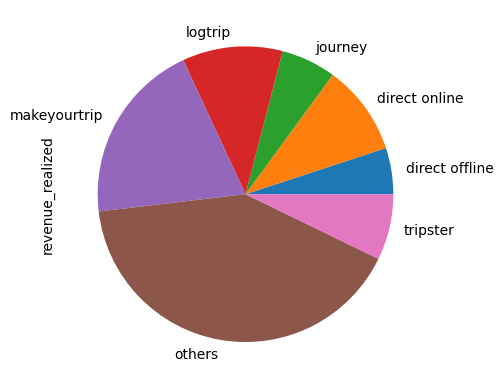

In [97]:
df_bookings_all.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie')